In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Here, the first three features - RowNumber	CustomerId	Surname are not going to impact the analysis in any which way. 
# SO, deleteing the same.

df = df.drop(["RowNumber","CustomerId","Surname"],axis=1)
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


# Pre - Processeing Starts

In [5]:
# 1. MIssing Data Treatment
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# 2. Encoding

# Only two columns/features 'Geography	Gender' needs encoding. 
df1 = df
df1 = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df1.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0


In [7]:
# 3. Outliers

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
Geography_Germany,10000.0,0.250900,0.433553,0.00,0.00,0.000,1.0000,1.00


In [8]:
# ONly balance shows much variation. Other features do not show any variation.

In [9]:
# 4. Imbalance Dataset Treatment

df1['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
2037*2

#dataset is imbalanced. But let us first build a model, then we will use SMOTE to fill in more data and make it balanced. 

4074

In [11]:
# SPliting the data before feature scaling

x = df1.drop(['Exited'],axis=1)
y=df1['Exited']

In [12]:
# 5. Feature Scaling

# Logistic, RF and DT will not require Feature Scaling. 
# But, we need scaled data for SVM and KNearest Model. 

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scx = sc.fit_transform(x)
scx

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

# Proeprocessing Ends:

1. No missing Data Found
2. 2 categorical variables encoded using one-hot encoder
3. No outliers 
4. Data is imbalanced. But will do treatment after model creation and evaluation
5. Feature scaling has been done. 

# Exploratory Data ANalysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<AxesSubplot:xlabel='Exited', ylabel='count'>

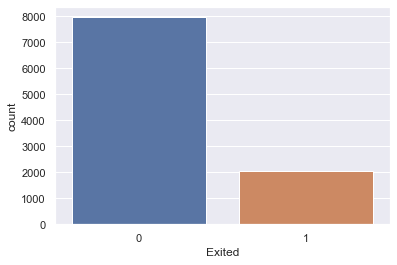

In [14]:
sns.countplot(df['Exited'])

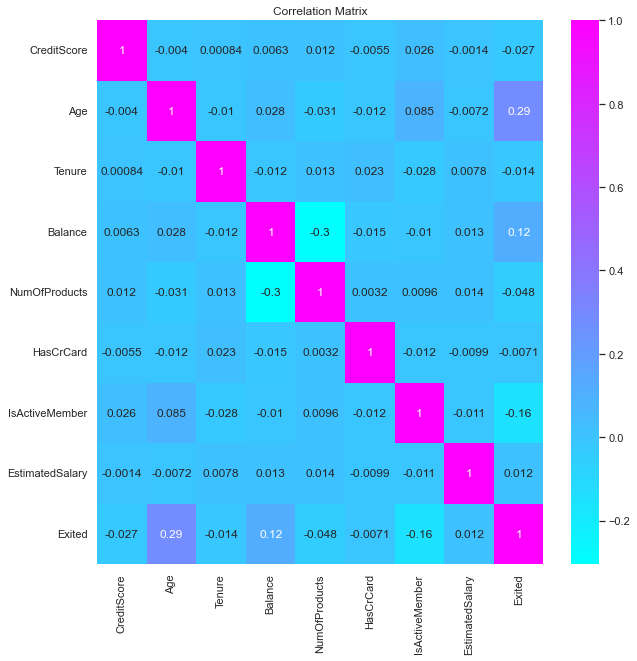

In [15]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True,cmap='cool')
plt.title("Correlation Matrix")
plt.show()

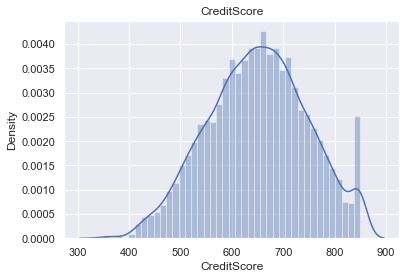

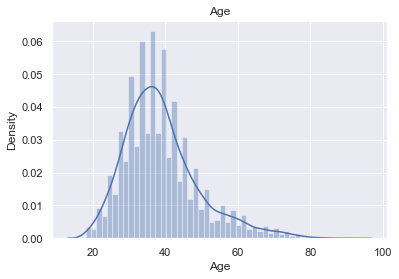

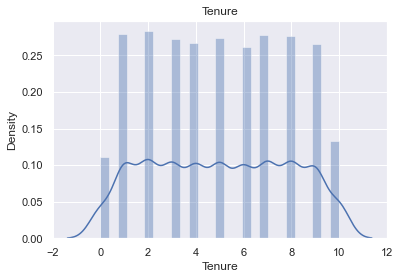

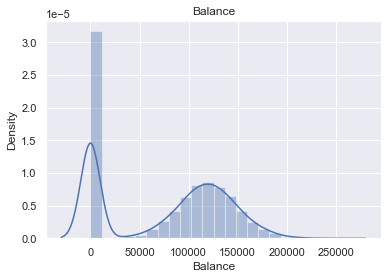

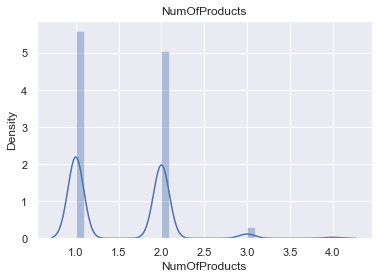

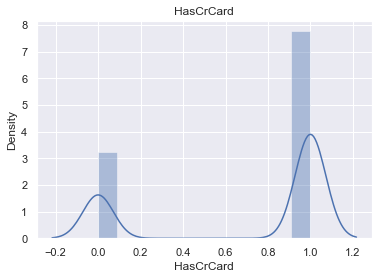

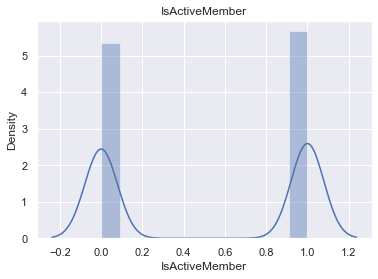

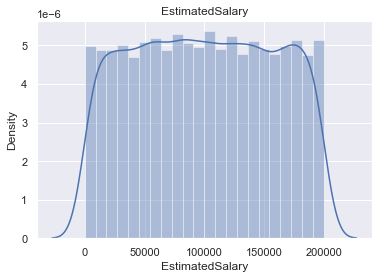

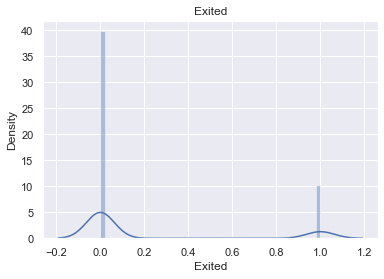

In [16]:
def dist(i):
    plt.title(i)
    sns.distplot(df[i])
    plt.show()
    
for i in df.select_dtypes(exclude='object').columns:
    dist(i)

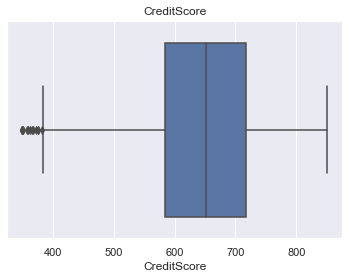

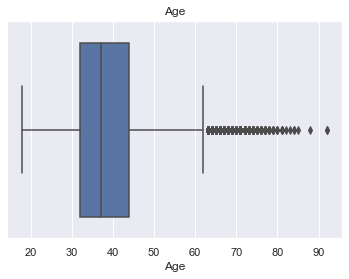

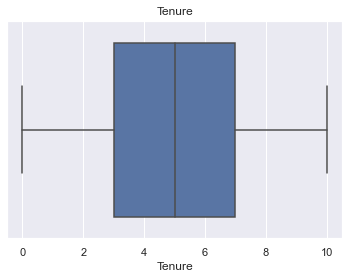

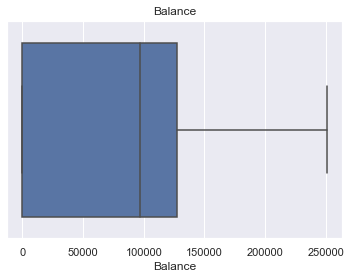

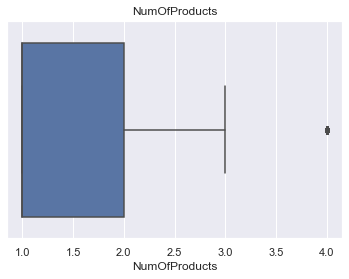

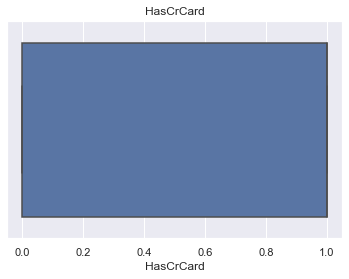

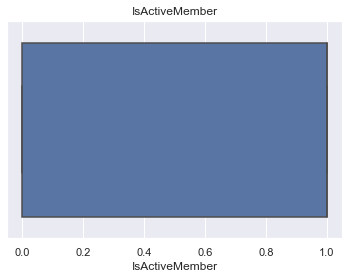

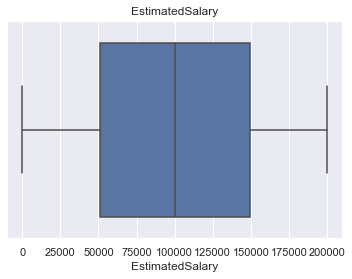

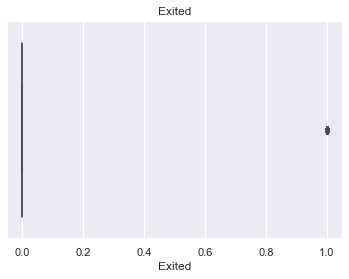

In [17]:
def box(i):
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()
    
for i in df.select_dtypes(exclude='object').columns:
    box(i)

<AxesSubplot:xlabel='Gender'>

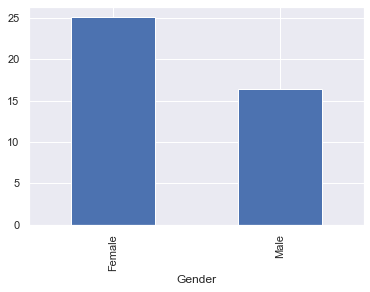

In [18]:
genderwise = pd.crosstab(df['Gender'],df['Exited'])
genderwise['Total'] = genderwise[0] + genderwise[1]
genderwise['%'] = genderwise[1]/genderwise["Total"] *100
genderwise['%'].plot(kind='bar')

<AxesSubplot:xlabel='Geography', ylabel='count'>

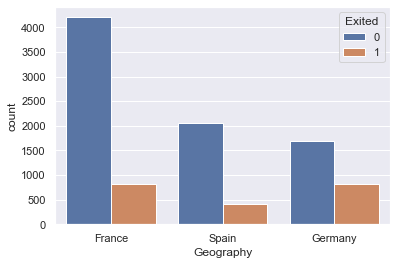

In [19]:
sns.countplot(df['Geography'],hue=df['Exited'])

<AxesSubplot:ylabel='%'>

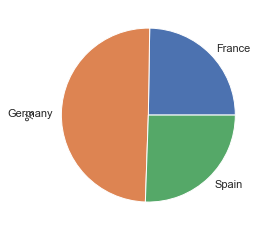

In [20]:
countrywise = pd.crosstab(df['Geography'],df['Exited'])
countrywise['Total'] = countrywise[0] + countrywise[1]
countrywise["%"] = countrywise[1]/countrywise['Total'] *100
countrywise['%'].plot(kind='pie')

In [21]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [22]:
from pandas_profiling import ProfileReport
report = ProfileReport(df)
report.to_file("Churn Model.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Spliting the data into trainig and testing dataset:

In [23]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=217)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8000, 11) (2000, 11) (8000,) (2000,)


# Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred_lr_train = lr.predict(x_train)
y_pred_lr_test = lr.predict(x_test)

### Evaluating the model

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

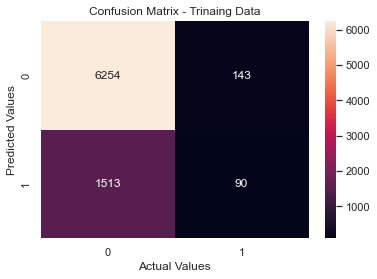

In [27]:
sns.heatmap(confusion_matrix(y_train,y_pred_lr_train),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Trinaing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

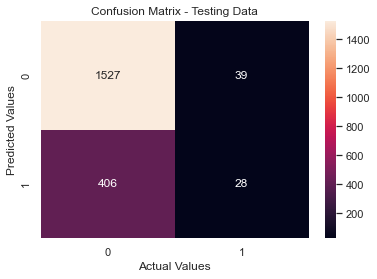

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred_lr_test),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [29]:
print(classification_report(y_train,y_pred_lr_train))
print(classification_report(y_test,y_pred_lr_test))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      6397
           1       0.39      0.06      0.10      1603

    accuracy                           0.79      8000
   macro avg       0.60      0.52      0.49      8000
weighted avg       0.72      0.79      0.73      8000

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1566
           1       0.42      0.06      0.11       434

    accuracy                           0.78      2000
   macro avg       0.60      0.52      0.49      2000
weighted avg       0.71      0.78      0.71      2000



In [30]:
print("Accuracy Score - Training Dataset",accuracy_score(y_train,y_pred_lr_train))
print("*************************************************************************")
print("Accuracy Score - Testing Dataset",accuracy_score(y_test,y_pred_lr_test))

Accuracy Score - Training Dataset 0.793
*************************************************************************
Accuracy Score - Testing Dataset 0.7775


In [31]:
# THE ACCURACY IS NOT VERY HIGH, NEERTHELESS THE MODEL IS NOT SHOWING ANY BIAS AND VARIANCE. 

# Decision Tree 

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred_dt_train = dt.predict(x_train)
y_pred_dt_test = dt.predict(x_test)

### Evaluating the model

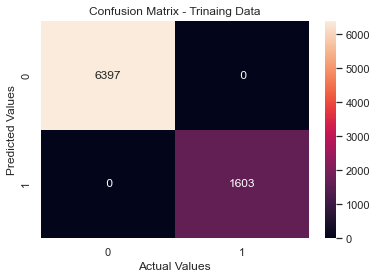

In [34]:
sns.heatmap(confusion_matrix(y_train,y_pred_dt_train),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Trinaing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

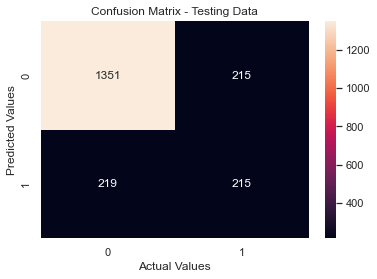

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt_test),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [36]:
print(classification_report(y_train,y_pred_dt_train))
print(classification_report(y_test,y_pred_dt_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6397
           1       1.00      1.00      1.00      1603

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1566
           1       0.50      0.50      0.50       434

    accuracy                           0.78      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.78      0.78      0.78      2000



In [37]:
print("Accuracy Score - Training Dataset",accuracy_score(y_train,y_pred_dt_train))
print("*************************************************************************")
print("Accuracy Score - Testing Dataset",accuracy_score(y_test,y_pred_dt_test))

Accuracy Score - Training Dataset 1.0
*************************************************************************
Accuracy Score - Testing Dataset 0.783


To much Variance is seen t=in this model. 
Training accuracy is perfect but testing accuracy is not very good. 
We should try other models too. 

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,criterion='gini')
rf.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

### Evaluating the model

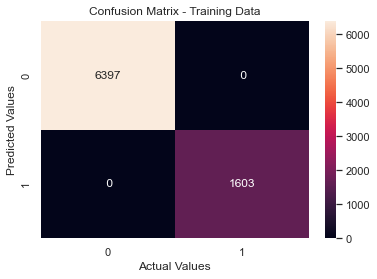

In [40]:
sns.heatmap(confusion_matrix(y_train,y_pred_rf_train),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

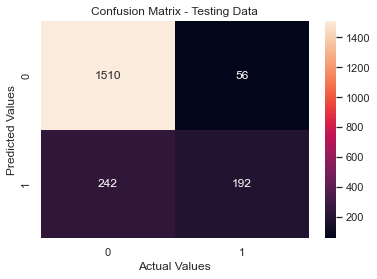

In [41]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf_test),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [42]:
print(classification_report(y_train,y_pred_rf_train))
print(classification_report(y_test,y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6397
           1       1.00      1.00      1.00      1603

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1566
           1       0.77      0.44      0.56       434

    accuracy                           0.85      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.84      0.85      0.83      2000



In [43]:
print("Accuracy Score - Training Dataset",accuracy_score(y_train,y_pred_rf_train))
print("*************************************************************************")
print("Accuracy Score - Testing Dataset",accuracy_score(y_test,y_pred_rf_test))

Accuracy Score - Training Dataset 1.0
*************************************************************************
Accuracy Score - Testing Dataset 0.851


n_estimators at 500 and 100 are giving same level of accuracy. 
Hence, keeping it at 100. 

1. Using Gini - Training accuracy 1.0  ::: Testing Accuracy - 0.853

2. Using Entropy - Training accuracy 1.0  ::: Testing Accuracy - 0.854
This accuracy of Random FOrest is better than Decision Tree and Logistic Regression. 
We will still try to execute other models to see if we can improve the accuracy level. 

# K-Nearest Neighbor (KNN)

##### Finding number of neighbors required using elbow method.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
error_rate = []

for i in range(2,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred!= y_test))
    
error_rate

[0.2455,
 0.268,
 0.2365,
 0.2465,
 0.2225,
 0.232,
 0.221,
 0.224,
 0.2225,
 0.224,
 0.2195,
 0.221,
 0.2185,
 0.2195,
 0.217,
 0.219,
 0.216,
 0.216,
 0.2175,
 0.2165,
 0.2175,
 0.217,
 0.217,
 0.217,
 0.2175,
 0.217,
 0.217,
 0.217]

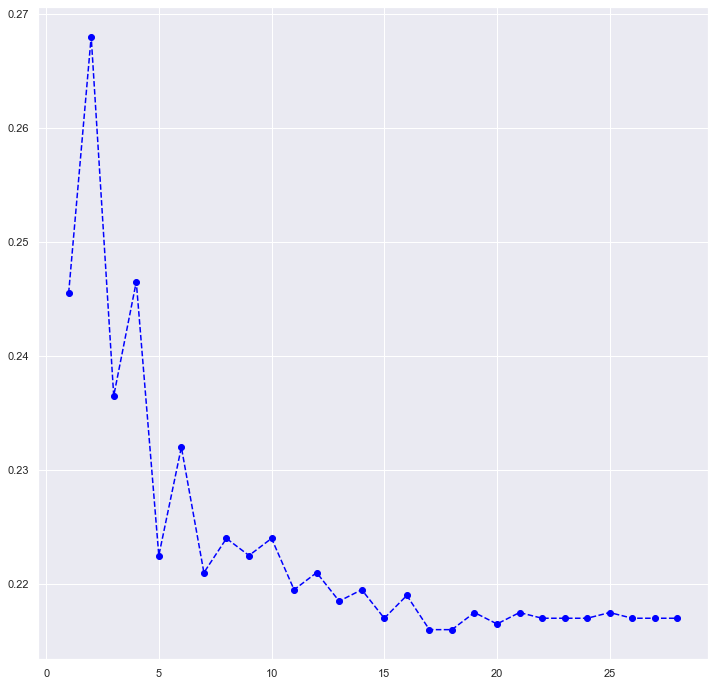

In [46]:
plt.figure(figsize=(12,12))
plt.plot(range(1,29),error_rate,color='blue',marker='o',linestyle = 'dashed')

In [50]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [51]:
y_pred_knn_train = knn.predict(x_train)
y_pred_knn_test = knn.predict(x_test)

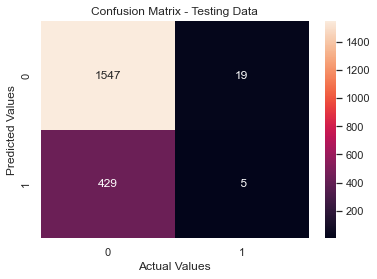

In [52]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn_test),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

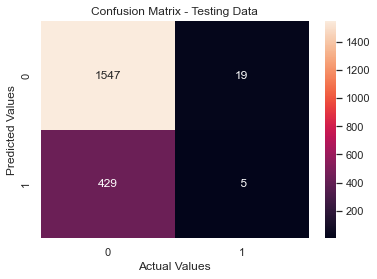

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn_test),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [54]:
print(classification_report(y_train,y_pred_knn_train))
print(classification_report(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      6397
           1       0.55      0.05      0.10      1603

    accuracy                           0.80      8000
   macro avg       0.68      0.52      0.49      8000
weighted avg       0.76      0.80      0.73      8000

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1566
           1       0.21      0.01      0.02       434

    accuracy                           0.78      2000
   macro avg       0.50      0.50      0.45      2000
weighted avg       0.66      0.78      0.69      2000



In [55]:
print("Accuracy Score - Training Dataset",accuracy_score(y_train,y_pred_knn_train))
print("*************************************************************************")
print("Accuracy Score - Testing Dataset",accuracy_score(y_test,y_pred_knn_test))

Accuracy Score - Training Dataset 0.80175
*************************************************************************
Accuracy Score - Testing Dataset 0.776


SO, using KNN Model also, we dont get very high accuracy score. But there is not bais and variance

# Adaboost

In [56]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50,random_state=217)
ada.fit(x_train,y_train)

AdaBoostClassifier(random_state=217)

In [57]:
y_pred_ada_train = ada.predict(x_train)
y_pred_ada_test = ada.predict(x_test)

### Evaluation

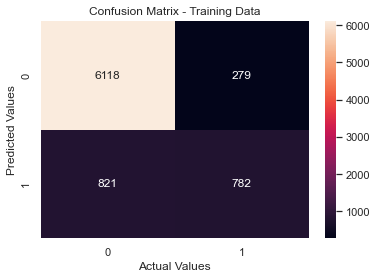

In [58]:
sns.heatmap(confusion_matrix(y_train,y_pred_ada_train),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

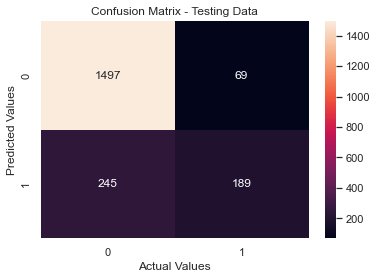

In [59]:
sns.heatmap(confusion_matrix(y_test,y_pred_ada_test),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [60]:
print(classification_report(y_train,y_pred_ada_train))
print(classification_report(y_test,y_pred_ada_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6397
           1       0.74      0.49      0.59      1603

    accuracy                           0.86      8000
   macro avg       0.81      0.72      0.75      8000
weighted avg       0.85      0.86      0.85      8000

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1566
           1       0.73      0.44      0.55       434

    accuracy                           0.84      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.83      0.84      0.83      2000



In [61]:
print("Accuracy Score - Training Dataset",accuracy_score(y_train,y_pred_ada_train))
print("*************************************************************************")
print("Accuracy Score - Testing Dataset",accuracy_score(y_test,y_pred_ada_test))

Accuracy Score - Training Dataset 0.8625
*************************************************************************
Accuracy Score - Testing Dataset 0.843


This is also good. No bias and no variance. Accuracy for both testing and training are good. 

# GradientBoost

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state = 1)
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [63]:
y_pred_gb_train = gb.predict(x_train)
y_pred_gb_test = gb.predict(x_test)

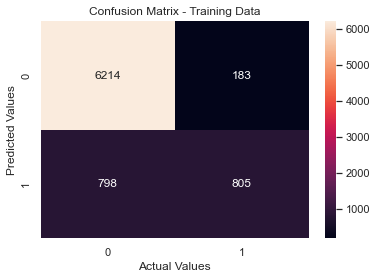

In [64]:
sns.heatmap(confusion_matrix(y_train,y_pred_gb_train),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

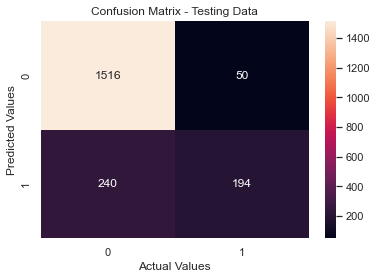

In [65]:
sns.heatmap(confusion_matrix(y_test,y_pred_gb_test),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [66]:
print(classification_report(y_train,y_pred_gb_train))
print(classification_report(y_test,y_pred_gb_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6397
           1       0.81      0.50      0.62      1603

    accuracy                           0.88      8000
   macro avg       0.85      0.74      0.77      8000
weighted avg       0.87      0.88      0.87      8000

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1566
           1       0.80      0.45      0.57       434

    accuracy                           0.85      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.85      0.84      2000



In [67]:
print("Accuracy Score - Training Dataset",accuracy_score(y_train,y_pred_gb_train))
print("*************************************************************************")
print("Accuracy Score - Testing Dataset",accuracy_score(y_test,y_pred_gb_test))

Accuracy Score - Training Dataset 0.877375
*************************************************************************
Accuracy Score - Testing Dataset 0.855


The training and testing accuracy is accuracy is better than all the models. 

# XGBoost

In [68]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [69]:
y_pred_xgb_train= xgb.predict(x_train)
y_pred_xgb_test = xgb.predict(x_test)

#### Evaluation

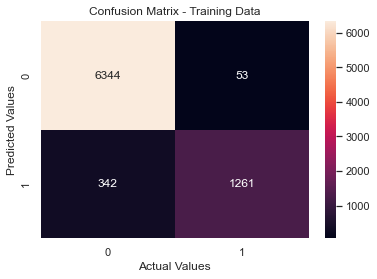

In [70]:
sns.heatmap(confusion_matrix(y_train,y_pred_xgb_train),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

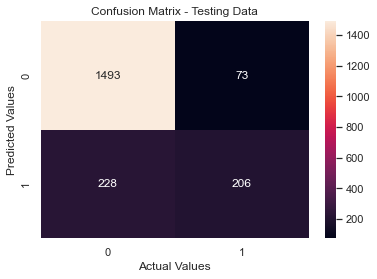

In [71]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb_test),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [72]:
print(classification_report(y_train,y_pred_xgb_train))
print(classification_report(y_test,y_pred_xgb_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6397
           1       0.96      0.79      0.86      1603

    accuracy                           0.95      8000
   macro avg       0.95      0.89      0.92      8000
weighted avg       0.95      0.95      0.95      8000

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1566
           1       0.74      0.47      0.58       434

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [73]:
print("Accuracy Score - Training Dataset",accuracy_score(y_train,y_pred_xgb_train))
print("*************************************************************************")
print("Accuracy Score - Testing Dataset",accuracy_score(y_test,y_pred_xgb_test))

Accuracy Score - Training Dataset 0.950625
*************************************************************************
Accuracy Score - Testing Dataset 0.8495


Accuracy for training is much higher in xgboost. FOr testing also, the accuracy is good. 
But there may be chances of bias in the model as the accuracy of both sets have almost 11% difference. 

Random forest or Gradient boost would be a better model. 

# SVM

In [74]:
from sklearn.svm import SVC

svmL = SVC(kernel='linear')
svmL.fit(x_train,y_train)

SVC(kernel='linear')

In [75]:
y_pred_svmL_train = svmL.predict(x_train)
y_pred_svmL_test = svmL.predict(x_test)

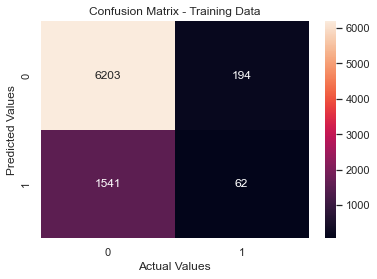

In [76]:
sns.heatmap(confusion_matrix(y_train,y_pred_svmL_train),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

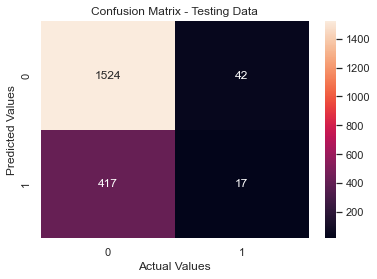

In [77]:
sns.heatmap(confusion_matrix(y_test,y_pred_svmL_test),annot=True,fmt = '2.00f')
plt.title("Confusion Matrix - Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [78]:
print(classification_report(y_train,y_pred_svmL_train))
print(classification_report(y_test,y_pred_svmL_test))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6397
           1       0.24      0.04      0.07      1603

    accuracy                           0.78      8000
   macro avg       0.52      0.50      0.47      8000
weighted avg       0.69      0.78      0.71      8000

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1566
           1       0.29      0.04      0.07       434

    accuracy                           0.77      2000
   macro avg       0.54      0.51      0.47      2000
weighted avg       0.68      0.77      0.70      2000



In [79]:
print("Accuracy Score - Training Dataset",accuracy_score(y_train,y_pred_svmL_train))
print("*************************************************************************")
print("Accuracy Score - Testing Dataset",accuracy_score(y_test,y_pred_svmL_test))

Accuracy Score - Training Dataset 0.783125
*************************************************************************
Accuracy Score - Testing Dataset 0.7705


The accuracy is better of other models. It took a lot of time aslo to execute the svm file. 
The accuracy for both training and testing is good...but not the best one. 

In [82]:
# Regularization

from sklearn.linear_model import Ridge, Lasso,ElasticNet

In [87]:
y_pred_r

array([0.47786933, 0.08527969, 0.1391274 , ..., 0.10997949, 0.05182822,
       0.43855786])

In [88]:
ridge = Ridge(alpha=0.001)
ridge.fit(x_train,y_train)
y_pred_r = ridge.predict(x_test)
y_pred_r = np.where(y_pred_r>0.5,1,0)
print("Accuracy Score of Ridge - ",accuracy_score(y_test,y_pred_r))

Accuracy Score of Ridge -  0.7915


In [89]:
lasso = Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
y_pred_l=lasso.predict(x_test)
y_pred_l = np.where(y_pred_l >0.5,1,0)
print("Accuracy score of Lasso is - ",accuracy_score(y_test,y_pred_l))

Accuracy score of Lasso is -  0.7915


In [90]:
en = ElasticNet(alpha=0.001)
en.fit(x_train,y_train)
y_pred_en = en.predict(x_test)
y_pred_en = np.where(y_pred_en >0.5,1,0)
print("Accuracy Score is Elastic Net - ",accuracy_score(y_test,y_pred_en))

Accuracy Score is Elastic Net -  0.7915


### Accuracy score is good for Ridge, Lasso and ElasticNet. 
There will be no ovwrfitting issue. So, overall a good model. 

# Done